## Reportar Producción Científica

Reporte para catedras conacyt

In [21]:
import csv
#import pandas as pd
import datetime
import bibtexparser

import os
from os import path

import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Fechas del reporte

#inicio = {
#    'day' : 1, 
#    'month' : 8,
#    'year' : 2018
#}

date_inicio = datetime.datetime(2019,9,1)

#fin = {
#    'day' : 30, 
#    'month' : 8,
#    'year' : 2019
#}

date_fin = datetime.datetime(2020,8,31)

# direccion de la base de datos
database_folder = '../../database/'

In [23]:
# Verificar que existe el folder

if not path.exists('text'):
    os.mkdir('text')

### Read databases

In [24]:
## Papers
with open(database_folder + 'myproducts.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bibtexparser.loads(bibtex_str)
#print(bib_database.entries)


# Teaching
teaching = []
with open(database_folder + 'teaching.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        teaching.append(dictio)

 
# Talks
talks = []
with open(database_folder + 'talks.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        talks.append(dictio)
        
# Developments
developments = []
with open(database_folder + 'developments.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        developments.append(dictio)
        
        
# Divulgacion
divulgacion = []
with open(database_folder + 'divulgacion.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        divulgacion.append(dictio)
#print(divulgacion)


# Propuestas
proposals = []
with open(database_folder + 'proposals.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        proposals.append(dictio)

In [25]:
# Papers and thesis

count = 0
count_jcr = 0
count_cona = 0
count_proc = 0
count_mt = 0
count_preprint = 0
count_otros = 0
count_divul = 0
count_prop = 0

jcr_entries = []
proc_entries = []
mt_entries = []
cona_entries = []
preprint_entries = []
otros_entries = []
divul_entries = []


for entry in bib_database.entries:
    #print(entry)
    entry_date = datetime.datetime(int(entry['year_reported']), int(entry['month_reported']), 1)
    #print(entry_date)
    #if int(entry['year']) >= int(inicio['year']) and int(entry['year']) <= int(fin['year']):
    if date_inicio <= entry_date and entry_date <= date_fin:
        count = count +1
        #print(prod)
        
        if entry['ENTRYTYPE'] == 'article':
            if entry['note'] == 'jcr':
                jcr_entries.append(entry)
                count_jcr += 1
                
            elif entry['note'] == 'conacyt':
                cona_entries.append(entry)
                count_cona += 1
                
            elif entry['note'] == 'divulgacion':
                divul_entries.append(entry)
                count_divul += 1
                
            else:
                otros_entries.append(entry)
                count_otros += 1
            
        if entry['ENTRYTYPE'] == 'inproceedings':
            proc_entries.append(entry)
            count_proc += 1
            
        if entry['ENTRYTYPE'] == 'mastersthesis':
            mt_entries.append(entry)
            count_mt += 1
            
        if entry['ENTRYTYPE'] == 'unpublished':
            preprint_entries.append(entry)
            count_preprint += 1
        
print(f"{count} products found")
print(f"{count_jcr} JCR products found")
print(f"{count_proc} Proccedings products found")
print(f"{count_mt} Master Thesis found")
print(f"{count_cona} conacyt articles")
print(f"{count_cona} conacyt articles")
print(f"{count_preprint} preprints")


6 products found
3 JCR products found
0 Proccedings products found
1 Master Thesis found
0 conacyt articles
0 conacyt articles
2 preprints


In [26]:
# Teaching
def toDate(cadena):
    return datetime.datetime.strptime(cadena, '%Y/%m/%d')

# list products between dates
count_sub = 0
total_hours = 0


for subject in teaching:
    #print(toDate(subject['Inicio']).year)
    if date_inicio <= toDate(subject['Inicio']) and date_fin >= toDate(subject['Fin']):
        count_sub += 1
        total_hours += int(subject['Horas'])
        
        
print(f"{count_sub} materias impartidas")
print(f"{total_hours} horas impartidas")

2 materias impartidas
144 horas impartidas


In [27]:
# list products between dates
count_activ = 0

activities_dv = []
for activ in divulgacion:
    #print(toDate(subject['Inicio']).year)
    if date_inicio <= toDate(activ['Date']) and date_fin >= toDate(activ['Date']):
        count_activ += 1
        activities_dv.append(activ)
        
print(f"{count_activ} actividades de divulación o vinculación")


1 actividades de divulación o vinculación


In [29]:
# list products between dates
count_prop = 0

proposals_filtered = []
for proposal in proposals:
    #print(toDate(subject['Inicio']).year)
    if date_inicio <= toDate(proposal['Date']) and date_fin >= toDate(proposal['Date']):
        count_prop += 1
        proposals_filtered.append(proposal)
        
print(f"{count_prop} propuestas")

1 propuestas


## Graficar los productos


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


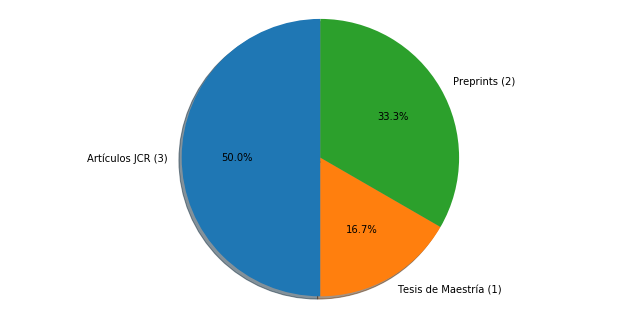

In [8]:
labels = []
publicaciones = []

# Graficar los productos
if count_jcr > 0:
    publicaciones.append(count_jcr)
    labels.append(f"Artículos JCR ({str(count_jcr)})")
    
if count_proc > 0:
    publicaciones.append(count_proc)
    labels.append(f"Congresos ({str(count_proc)})")

if count_mt > 0:
    publicaciones.append(count_mt)
    labels.append(f"Tesis de Maestría ({str(count_mt)})")
    
if count_cona > 0:
    publicaciones.append(count_cona)
    labels.append(f"Articulos Conacyt ({str(count_cona)})")
    
if count_preprint > 0:
    publicaciones.append(count_preprint)
    labels.append(f"Preprints ({str(count_preprint)})")
    
#if count_otros > 0:
#publicaciones.append(count_otros)
#labels.append("Otros")

fig, ax1 = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))

ax1.pie(publicaciones, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig("text/products.eps", format = 'eps')
plt.savefig("text/products.pdf", format = 'pdf')
plt.show()


In [9]:
# Crear un archivo .tex para la producción científica
# Articulos JCR

# write data in a file. 
file1 = open("text/productividad.tex","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]  
  
# \n is placed to indicate EOL (End of Line) 
if count_jcr > 0:
    file1.write("\subsubsection{Artículos publicados/aceptados en revistas indexadas en el Journal Citations Reports.}")
    file1.write("\\begin{itemize} \n") 
    
    for entry in jcr_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']} \n") 
                    
    file1.write("\\end{itemize} \n") 
                    
                    
if count_cona > 0:
   file1.write("\subsubsection{Artículos publicados/aceptados en revistas indexadas en el índice CONACYT:}")
   file1.write("\\begin{itemize} \n") 
                    
   for entry in cona_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']} \n")        

   file1.write("\\end{itemize} \n") 
                    
                    
if count_proc > 0:
   file1.write("\subsubsection{Artículos publicados/aceptados en congresos internacionales:}")
   file1.write("\\begin{itemize} \n") 
                    
   for entry in proc_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['booktitle']}, {entry['year']} \n")        

   file1.write("\\end{itemize} \n") 
                    
                    
if count_otros > 0:
   file1.write("\subsubsection{Otros artículos publicados:}")
   file1.write("\\begin{itemize} \n") 
                    
   for entry in otros_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']} \n")            

   file1.write("\\end{itemize} \n") 
                    
                                        
#file1.writelines(L) 
file1.close() #to change file access modes 


### Enviados

In [10]:
# Crear un archivo .tex para los preprints
  
if count_preprint > 0:
    # write data in a file. 
    file1 = open("text/preprints.tex","w") 

    file1.write("\n \subsubsection{Preprints (artículos en revisión):}")
    file1.write("\\begin{itemize} \n") 
    
    for entry in preprint_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']} \n") 
                    
    file1.write("\\end{itemize} \n") 
                    
    file1.close() #to change file access modes 

### Graduados de Maestría

In [18]:
# MAESTRIA

# write data in a file. 
file1 = open("text/master_students.tex","w")

#file1.write("\\item{\\bf GRADUATED MASTER STUDENTS: }\n")
    
if count_mt > 0:
    file1.write("\subsubsection{Estudiantes de maestría graduados:}\n")
    file1.write("\\begin{itemize} \n")
    
    mt_entries = sorted(mt_entries, key = lambda i: i['year'], reverse = True)
                    
    for entry in mt_entries:
        file1.write(f"\\item {entry['author']}, \\textit{{ {entry['title']},}} {entry['year']} \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

### Carga Académica

In [17]:
# Teaching
def toDate(cadena):
    return datetime.datetime.strptime(cadena, '%Y/%m/%d')

# list products between dates
count_sub = 0
total_hours = 0

for subject in teaching:
    #print(toDate(subject['Inicio']).year)
    if date_inicio <= toDate(subject['Inicio']) and date_fin >= toDate(subject['Fin']):
        count_sub += 1
        total_hours += int(subject['Horas'])     
        
print(f"{count_sub} materias impartidas")
print(f"{total_hours} horas impartidas")


# write data in a file. 
file1 = open("text/teaching.tex","w")

#file1.write("\\item{\\bf GRADUATED MASTER STUDENTS: }\n")
    
if len(teaching) > 0:
    #teaching = sorted(teaching, key = lambda i: i['year'], reverse = True)
    file1.write("\subsubsection{Materias impartidas:}\n")
    
    file1.write("\\begin{itemize} \n")
                    
    for entry in teaching:
        if date_inicio <= toDate(entry['Inicio']) and date_fin >= toDate(entry['Fin']):
            file1.write(f"\\item {entry['Inicio']}, \\textit{{ {entry['Nombre']},}} nivel {entry['Nivel']}, {entry['Horas']} horas. \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

2 materias impartidas
144 horas impartidas


### Divulgación

In [13]:
# Crear un archivo tex para las actividades de divulgacion

# write data in a file. 
file1 = open("text/divulgacion.tex","w")

#print(activities_dv)

if count_proc > 0:
    file1.write("\subsubsection{Artículos de divulgación de la ciencia publicados/aceptados.} \n")
    file1.write("\\begin{itemize} \n") 
                    
    for entry in divul_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']} \n")            

    file1.write("\\end{itemize} \n") 

if count_activ > 0:
    file1.write("\subsubsection{Actividades de vinculación o divulgación de la ciencia.} \n")
    file1.write("\\begin{itemize} \n") 
        
    for entry in activities_dv:
        if entry['Type'] == 'platica':
            file1.write(f"\\item Plática impartida en el/la {entry['Event']} con el título {entry['Title']}, {entry['Place']}, {entry['Date']} \n")
        elif entry['Type'] == 'torneo':
            file1.write(f"\\item Participación en el/la {entry['Event']}, {entry['Place']}, {entry['Date']} \n")        
        else:
            file1.write(f"\\item Participación en el/la {entry['Event']}, {entry['Place']}, {entry['Date']} \n")             

    file1.write("\\end{itemize} \n") 
                    
                    
#file1.writelines(L) 
file1.close() #to change file access modes 

### Propuestas


In [31]:
# Crear un archivo tex para las actividades de divulgacion

# write data in a file. 
file1 = open("text/proposals.tex","w")

#print(activities_dv)

if count_prop > 0:
    file1.write("\subsubsection{Propuestas de proyectos de investigación.} \n")
    file1.write("\\begin{itemize} \n") 
                    
    for entry in proposals_filtered:
        file1.write(f"\\item {entry['Title']}, {entry['Type']}, {entry['Status']}. \n")            

    file1.write("\\end{itemize} \n") 
                   
                    
#file1.writelines(L) 
file1.close() #to change file access modes